In [ ]:
from pandas import *
import seaborn as sns 
import matplotlib.pyplot as plt

# Take the Data

In [ ]:
df=read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Analysis 

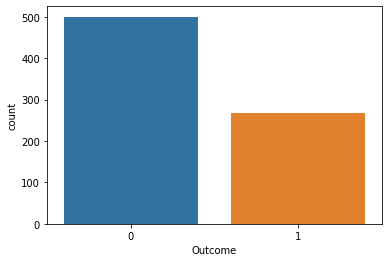

In [ ]:
sns.countplot(x='Outcome',data=df)

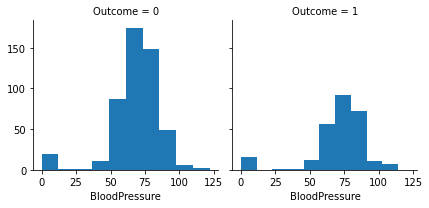

In [ ]:
b=sns.FacetGrid(df,col='Outcome')
b.map(plt.hist,'BloodPressure')

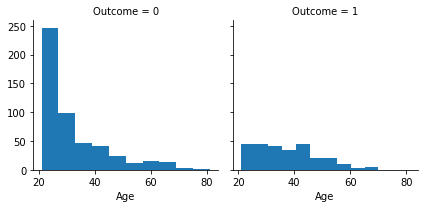

In [ ]:
b=sns.FacetGrid(df,col='Outcome')
b.map(plt.hist,'Age')

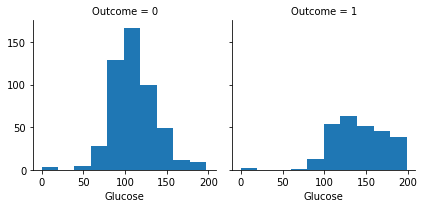

In [ ]:
b=sns.FacetGrid(df,col='Outcome')
b.map(plt.hist,'Glucose')

# Input and Output Variables 

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Preprocessing and Standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Train and Test Variables 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Regressor 

In [ ]:
log=LogisticRegression()

# Fit the Model 

In [ ]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_pred_y=log.predict(x_test)

In [ ]:
from sklearn.metrics import *

# Accuracy Score 

In [ ]:
accuracy_score(y_test,log_pred_y )

0.7987012987012987

# Confusion Matrix

In [ ]:
confusion_matrix(y_test,log_pred_y)

array([[94, 13],
       [18, 29]])

 # Classification Report 

In [ ]:
print(classification_report(y_test,log_pred_y))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



# K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Regressor 

In [ ]:
knn=KNeighborsClassifier()

# Fit the Model 

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred_y=knn.predict(x_test)


# Accuracy Score 

In [ ]:
accuracy_score(y_test,knn_pred_y)

0.8181818181818182

# Confusion Matrix 

In [ ]:
confusion_matrix(y_test,knn_pred_y)

array([[96, 11],
       [17, 30]])

# Classification Report 

In [ ]:
print(classification_report(y_test,knn_pred_y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



# Increase the Neighbors 

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=7,metric='euclidean')

# Fit the Model 

In [ ]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
knn1_pred_y=knn1.predict(x_test)

# Accuracy Score 

In [ ]:
accuracy_score(y_test,knn1_pred_y)

0.7922077922077922

# Confusion Matrix 

In [ ]:
confusion_matrix(y_test,knn1_pred_y)

array([[95, 12],
       [20, 27]])

# Classifiaction Report 

In [ ]:
print(classification_report(y_test,knn1_pred_y))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Regressor 

In [ ]:
dtc=DecisionTreeClassifier(random_state=0)

# Fit the Model

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
dtc_pred_y=dtc.predict(x_test)

# Accuracy Score 

In [ ]:
accuracy_score(y_test,dtc_pred_y)

0.7142857142857143

# Confusion Matrix 

In [ ]:
confusion_matrix(y_test,dtc_pred_y)

array([[79, 28],
       [16, 31]])

# Classification Report 

In [ ]:
print(classification_report(y_test,dtc_pred_y))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       107
           1       0.53      0.66      0.58        47

    accuracy                           0.71       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.74      0.71      0.72       154



# Support Vectored Machines 

In [ ]:
from sklearn.svm import SVC 

# Regressor 

In [ ]:
svm=SVC(kernel='linear',random_state=0)

# Fit the Model 

In [ ]:
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_pred_y=svm.predict(x_test)

# Accuracy Score 

In [ ]:
accuracy_score(y_test,svm_pred_y)

0.8116883116883117

# Confusion Matrix 

In [ ]:
confusion_matrix(y_test,svm_pred_y)

array([[96, 11],
       [18, 29]])

# Classification Report 

In [ ]:
print(classification_report(y_test,svm_pred_y))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



# Keeping kernel to RBF

In [ ]:
svm1=SVC(kernel='rbf',random_state=0)

# Fit the Model 

In [ ]:
svm1.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm1_pred_y=svm1.predict(x_test)

# Accuracy Score 

In [ ]:
accuracy_score(y_test,svm1_pred_y)

0.8051948051948052

# Confusion Matrix 

In [ ]:
confusion_matrix(y_test,svm1_pred_y)

array([[96, 11],
       [19, 28]])

# Classification Report 

In [ ]:
print(classification_report(y_test,svm1_pred_y))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

